# Importamos librerías a utilizar

In [1]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt
#Para leer desde un archivo
import pandas as pd 
import numpy as np
#Para generar errores aleatorios
import random as rd

# Funciones para imprimir la informacion de la red
## ACTIVIDAD 1: Información general de la red
Coloque la función imprime_informacion. Esta función imprime la información de la red. Recibe la red G e imprime el numero de nodos, numero de enlaces, diámetro, y densidad de la red G.

In [2]:
''' Funcion imprime las caracteristicas de cierta red
    In:  Red
    Out:   '''
def imprime_informacion(G):
    n = len(nx.nodes(G))                 #Numero de nodos        
    m = len(nx.edges(G))                 # enlaces    
    d = nx.diameter(G)                   # diametro
    D = nx.density(G)                    #densidad
    print("Informacion de la red: \n- nodos\t\t= " + str(n) +
          "\n- enlaces\t= "   + str(m) +
          "\n- diámetro\t= "  + str(d) +
          "\n- densidad\t= "  + "{:.3f}".format(D))       #impresion con formato

## ACTVIDAD 2: Distribución de grados
Coloque la función grafica_distribucion_grados. Esta funcion grafica la distribucion de grados. Recibe la red G y la variable nombre_dg. Cálcula, imprime y gráfica la distribución de grados. La gráfica la guarda en un archivo png con nombre almacenado en la variable nombre_dg. Devuleve la distribución de grados

In [3]:
''' Funcion grafica la distribucion de grados asociada a cierta red
    In:  Red
         Nombre de la imagen a obtener
    Out: Distribucion de nodos       '''
def grafica_distribucion_grados(G, nombre_dg):
    DistGrados = nx.degree_histogram(G)                   #Lista de distribucion de grados
    #print(DistGrados)
    plt.title("Distribución de grados:"+ nombre_dg)       #Configuracion de titulo de grafica
    plt.ylabel('Número de nodos')                         #Configuracion de etiqueta de eje y
    plt.xlabel('Grado')                                   #Configuracion de etiqueta de eje X
    plt.plot(DistGrados)#plt.stem(DistGrados,use_line_collection = True)       #Graficado de grafica de distribucion, usando el argumento coleccion de linea
    plt.savefig("DisGrado_"+nombre_dg + ".png")
    plt.clf()
    return DistGrados

In [4]:
''' Funcion imprime una red
    In:  Red
         Nombre de la imagen a obtener
    Out: '''
def grafica_red(G, nombre_red):
    nx.draw(G,with_labels=True,node_color="pink")
    plt.title("Red: "+ nombre_red)       #Configuracion de titulo de grafica
    plt.savefig(nombre_red+".png")
    plt.clf()

# ACTIVIDAD 3: Mapa de calor por grado nodal
Coloque la función mapa_calor_grado. Esta función gráfica el mapa de calor de la red G. Recibe como parámetros a la red G y la variable nombre_red. Grafica el mapa de calor y lo guarda en un archivo png con el nombre alamcenado en nombre_red.

In [5]:
''' Funcion imprime el mapa de calor de una red
    In:  Red
         Nombre de la imagen a obtener
    Out: '''
def mapa_calor_grado(G, nombre_mcalor_grado):
    degree_map = {node:nx.degree(G, node) for node in G.nodes()}
    #valores máximo y mínimos de grado
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(degree_map.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    mapa_color = plt.get_cmap('jet')                                                        #Modificacion de mapa de calor
    #dibujamos la red
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    plt.title("Mapa de calor:"+ nombre_mcalor_grado)
    cbar.set_label('Grado')
    plt.savefig("MapaC"+nombre_mcalor_grado + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

# Funciones para análizar la red sometida a fallos o ataques

## ACTIVIDAD 4: Número de componentes conectado

Cree una función llamada num_componentes_conectados que recibe como parámetro la red G y devuelve el número de componentes conectados de G.Utilizar los métodos ya diseñados en python para el calculo de componentes conectados de una red, ver https://networkx.org/documentation/stable/reference/algorithms/component.html. 

In [6]:
''' Funcion calcula el numero de componentes conectados
    In:  Red        
    Out: Numero de componentes conectados   '''
def num_componentes_conectados(G):    
    return nx.number_connected_components(G)          #calcula y devuelve el numero de componentes conectados

## ACTIVIDAD 5: Proporción del componente gigante

Cree una función llamada prop_componente_gigante que recibe como parámetro la red G y devuelve al proporción de nodos que tiene el componente gigante con respecto a los nodos que tiene G. Utilizar los métodos ya diseñados en python para el calculo de componentes conectados de una red, ver https://networkx.org/documentation/stable/reference/algorithms/component.html. Recuerde que la función len(A) le permite calcular el número de elementos en un conjunto o lista A.

In [7]:
''' Funcion calcula la proporcion del componente gigante
    In:  Red        
    Out: Proporcion del componente gigante   '''
def prop_componente_gigante(G):    
    return len(max(nx.connected_components(G), key=len))/len(nx.nodes(G))     #devuelve el cociente de la longitud del componente gigante sobre el numero de nodos de la red actual

## ACTIVIDAD 6: Graficar dos funciones en una misma figura
Funcion que grafica dos funciones en una misma figura. Comente lo que ocurre en cada línea de código de la función

Parámetros:

1) titulo : texto

2) f1_valores: lista de numeros

3) f2_valores: lista de numeros

4) f1_leyenda: texto

5) f2_leyenda: texto

6) ejex_etiqueta: texto

7) ejey_etiqueta: texto

In [8]:
''' Funcion que grafica dos funciones en un solo grafico
    In:  Titulo del grafico
         Series de datos F1 y F2
         Leyendas de representacion de series F1 y F2
         Etiquetas para los ejes X y Y
    Out:   '''
def grafica_funciones(titulo,f1_valores, f2_valores,f1_leyenda, f2_leyenda ,ejex_etiqueta, ejey_etiqueta):
    plt.title(titulo)                         #Asigna el titulo al grafico a generar
    plt.plot(f1_valores, label=f1_leyenda)    #Grafica la serie de valores F1 y asigna una leyenda representativa a esta serie
    plt.plot(f2_valores, label=f2_leyenda)    #Grafica la serie de valores F2 y asigna una leyenda representativa a esta serie
    plt.xlabel(ejex_etiqueta)                 #Asigna la etiqueta correspondiente al eje x
    plt.ylabel(ejey_etiqueta)                 #Asigna la etiqueta correspondiente al eje y
    plt.legend()                              #Muestra las leyendas en el grafico

# Funciones para simular de Errores

## ACTIVIDAD 7: Función para simular un error
Cree la función error(G) que simule un error en la red G.

1) error(G) - Recibe una red G, elimina un nodo i aleatoreamente y devuelve la nueva red G (sin el nodo i)

In [9]:
''' Funcion que simula un error en una red G
    In:  Grafo        
    Out: Red despues del fallo  '''
def error(G):    
    if len(nx.nodes(G)) > 0:                                     #Si hay nodos         
        nodosL = list(nx.nodes(G))
        G.remove_node(nodosL[rd.randint(0,len(nodosL)-1)])      #Obten un indice aleartorio de la lista de nodos en G y eliminalo
    return G

## ACTIVIDAD 8: Función para simular varios errores secuenciales
Cree la función errores_secuenciales(G,num_errores)

2) errores_secuenciales(G,num_errores) - Recibe una red G y un entero "num_errores" que indica la cantidad de errores que ocurrirán en la red. Secuencialmente llama "num_errores" veces a la función error(G). Después de cada error almacena en una lista el número de componentes conectados de G y en otra lista la proporción del componente gigante. Devuleve la tupla (num_cc_lista, prop_cg_lista), en donde num_cc_lista es una lista de enteros cuyos elementos indican el numero de componentes conectados después de cada error. Mientras que prop_cg_lista es una lista de flotantes cuyos elementos indican la proporción del compoente gigante después de cada error.

In [10]:
''' Funcion que ejecuta varios fallos secuenciales 
    In:  Grafo
         Numero de errores
    Out: Tupla de elementos conectados y proporcion de elemento gigante por fallo  '''
def errores_secuenciales(G,num_errores):    
    num_cc_l  = []
    prop_cg_l = []
    for i in range(0,num_errores):                          #para un numero de errores dado
        error(G)                                            #simula error
        num_cc_l.append(num_componentes_conectados(G))      #Almacena en lista
        prop_cg_l.append(prop_componente_gigante(G))        #Almacena en lista
    return (num_cc_l, prop_cg_l)

# Funciones para simular de Ataques

## ACTIVIDAD 9: Función para simular un ataque por grado nodal
Cree la función ataque_grado(G) que simule un ataque por grado nodal en la red G.

1) ataque_grado(G) - Recibe una red G, elimina el nodo i de más alto grado grado y devuelve la nueva red G (sin el nodo i). Opcionalmente puede crear una función nodo_max_grado(G) que devuelva el nodo de grado mas alto en G. Después puede llamar esta función desde la función ataque_grado(G)

In [11]:
''' Funcion busca el nodo con mayor grado nodal de la red G
    In:  Grafo        
    Out: Nodo con mayor grado nodal  '''
def nodo_max_grado(G):
    gradosL = []
    for iterador in nx.nodes(G):
        gradosL.append(nx.degree(G,iterador))                 #calcula y añade a una lista los grados nodales de cada nodo en G
    return list(nx.nodes(G))[gradosL.index(max(gradosL))]     #Busca el mayor grado nodal de lista, obten el indice y regresa tal nodo

''' Funcion simula un ataque dirigido por grado nodal
    In:  Grafo        
    Out: Red despues del ataque  '''
def ataque_grado(G):
    #print(nodo_max_grado(G))           #debug
    G.remove_node(nodo_max_grado(G))    #elimina el nodo con mayor grado nodal de G
    return G

## ACTIVIDAD 10: Función para simular varios ataques (por grado nodal) secuenciales
Cree la función ataques_secuenciales(G,num_ataques)

2) ataques_secuenciales(G,num_ataques) - Recibe una red G y un entero "num_ataques" que indica la cantidad de ataques que ocurrirán en la red. Secuencialmente llama "num_ataques" veces a la función ataque(G). Después de cada ataque almacena en una lista el número de componentes conectados de G y en otra lista la proporción del componente gigante. Devuleve la tupla (num_cc_lista, prop_cg_lista), en donde num_cc_lista es una lista de enteros cuyos elementos indican el numero de componentes conectados después de cada error. Mientras que prop_cg_lista es una lista de flotantes cuyos elementos indican la proporción del compoente gigante después de cada error.

In [12]:
''' Funcion que ejecuta varios ataques secuenciales 
    In:  Grafo
         Numero de errores
    Out: Tupla de elementos conectados y proporcion de elemento gigante por fallo  '''
def ataques_secuenciales(G,num_ataques):
    num_cc_l  = []
    prop_cg_l = []
    for i in range(0,num_ataques):                                    #para un dado numeor de ataques
        ataque_grado(G)                                               #simula ataque
        #grafica_red(G,"test it"+str(int(i)))                         #debug
        num_cc_l.append(num_componentes_conectados(G))                #Almacena en lista
        prop_cg_l.append(prop_componente_gigante(G))                  #Almacena en lista
    return (num_cc_l, prop_cg_l)

# Evaluación de redes sometidas a errores - Red de escala libre vs. red de aleatoria

## ACTIVIDAD 11: Creación de la redes de escala libre y aleatoria
Creamos una red aleatoria Erdos-Renyi (con parámetro p=0.1) y una red de escala libre Barabasi-Albert (con parámetro m=5), imprimos la información de ambas redes y las dibujamos y guardamos ambas imagenes

In [13]:
# Barabasi-Albert
def CreaRedELibreBarbAlb(n , m):
    Red = nx.barabasi_albert_graph(n, m, seed=None)         #Genera Red
    return Red

In [14]:
# Erdos-Renyi
def CreaAleatoriaGilbert(n, p):
    Red = nx.erdos_renyi_graph(n, p, seed=None, directed=False)  #Genera Red
    return Red

In [15]:
n = 100                    #Numero de nodos
m = 5                      #
p = 0.10                   #Probabilidad de reconexion
RedElibre    = CreaRedELibreBarbAlb(n,m)
imprime_informacion(RedElibre)
      
RedAleatoria = CreaAleatoriaGilbert(n,p)
imprime_informacion(RedAleatoria)

Informacion de la red: 
- nodos		= 100
- enlaces	= 475
- diámetro	= 4
- densidad	= 0.096
Informacion de la red: 
- nodos		= 100
- enlaces	= 495
- diámetro	= 4
- densidad	= 0.100


In [16]:
grafica_red(RedElibre,"Red de escala libre")

<Figure size 432x288 with 0 Axes>

In [17]:
grafica_red(RedAleatoria,"Red aleatoria")

<Figure size 432x288 with 0 Axes>

## ACTIVIDAD 12: Distribución de grados
Llama a la función para graficar las distribucion de grados de las redes creadas y guarda ambas imagenes. Cada función llamela en una celda separada de código para que así pueda visualizar ambas figuras

In [18]:
# Distribucion de grados BA
DistGElibre = grafica_distribucion_grados(RedElibre,"Escala libre")

<Figure size 432x288 with 0 Axes>

In [19]:
# Distribucion de grados ER
DistGAleatoria = grafica_distribucion_grados(RedAleatoria,"Aleatoria")

<Figure size 432x288 with 0 Axes>

## ACTIVIDAD 13: Mapas de calor por grado nodal
Llama a la función para graficar los mapas de calor por grado nodal de las redes creadas y guarda ambas imagenes. Cada función llamela en una celda separada de código para que así pueda visualizar ambas figuras

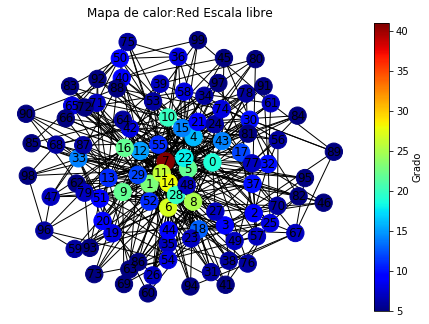

<Figure size 432x288 with 0 Axes>

In [20]:
# Mapa de calor BA
mapa_calor_grado(RedElibre,"Red Escala libre")

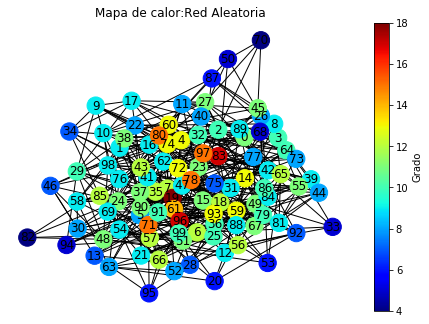

<Figure size 432x288 with 0 Axes>

In [21]:
mapa_calor_grado(RedAleatoria,"Red Aleatoria")

## ACTIVIDAD 14: Simulación de errores secuenciales
Utilizando la función errores_secuenciales simula 99 errores en cada una de las redes creadas. En ambos casos, almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante.

Es importante que la función errores_secuenciales reciba como paŕametro una copia de la red que se va a evaluar, de otro modo se modificará la red original.

In [22]:
RedElibre2     = RedElibre.copy()
RedAleatoria2  = RedAleatoria.copy()
tuplaLibre     = errores_secuenciales(RedElibre2,99)
tuplaAleatoria = errores_secuenciales(RedAleatoria2,99)

## ACTIVIDAD 15: Grafica de los componentes conectados vs. número de errores
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de errroes

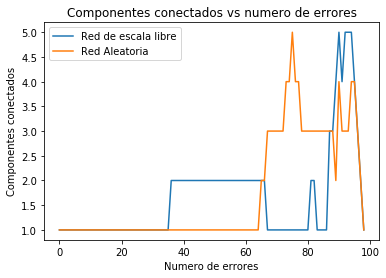

In [23]:
grafica_funciones("Componentes conectados vs numero de errores",tuplaLibre[0], tuplaAleatoria[0],"Red de escala libre", "Red Aleatoria" ,"Numero de errores", "Componentes conectados")

## ACTIVIDAD 16: Grafica de la proporción del componente gigante vs. número de errores
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de errroes

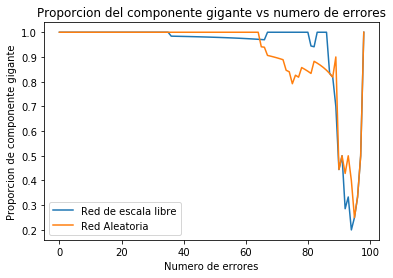

In [24]:
grafica_funciones("Proporcion del componente gigante vs numero de errores",tuplaLibre[1], tuplaAleatoria[1],"Red de escala libre", "Red Aleatoria" ,"Numero de errores", "Proporcion de componente gigante")

## ACTVIDAD 17 Simulación de ataques (por grado nodal) secuenciales
Utilizando la función ataques_secuenciales simula 99 ataques en cada una de las redes creadas. En ambos casos, almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante.

Es importante que la función errores_secuenciales reciba como paŕametro una copia de la red que se va a evaluar, de otro modo se modificará la red original.

In [25]:
RedElibre3     = RedElibre.copy()
RedAleatoria3  = RedAleatoria.copy()
tuplaLibre2     = ataques_secuenciales(RedElibre3,99)
tuplaAleatoria2 = ataques_secuenciales(RedAleatoria3,99)

## ACTVIDAD 18 Grafica de los componentes conectados vs. número de errores
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de errroes

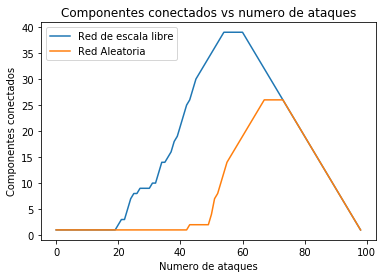

In [26]:
grafica_funciones("Componentes conectados vs numero de ataques",tuplaLibre2[0], tuplaAleatoria2[0],"Red de escala libre", "Red Aleatoria" ,"Numero de ataques", "Componentes conectados")

## ACTVIDAD 19: Grafica de la proporción del componente gigante vs. número de errores
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de errroes

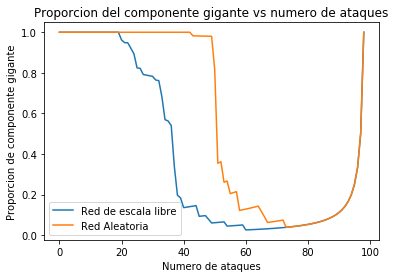

In [27]:
grafica_funciones("Proporcion del componente gigante vs numero de ataques",tuplaLibre2[1], tuplaAleatoria2[1],"Red de escala libre", "Red Aleatoria" ,"Numero de ataques", "Proporcion de componente gigante")